<a href="https://colab.research.google.com/github/Ananas91Alsaadi/Caffeshop/blob/main/Anas_Alsaadi_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4DV650 - System Modeling and Simulation

In [ ]:
#General imports
from typing import NamedTuple

#imports for math
import random
import numpy
import math
from scipy import stats

#imports for plots
import matplotlib.pyplot as plt
import statsmodels.api as sm

Define some constants for running the experiments

In [ ]:
SIZE = 1000
SEED = 1300

# Generating an array of Uniform Random Numbers
Generate a sequence of random numbers by means of the `random()` function provided by Python

In [ ]:
def uniform_array(samples, seed=None):
  random.seed(seed)
  random_list = []
  for i in range(samples):
    random_list.append(random.random())
  return numpy.array(random_list)

uniform_array = uniform_array(SIZE)
print(uniform_array)

[2.22702275e-01 4.18297953e-01 2.42974943e-01 7.70989855e-01
 5.76475030e-01 1.96207438e-01 8.10590524e-02 7.03305347e-01
 8.34604708e-02 5.71537588e-01 1.36497086e-01 9.87615223e-01
 5.07858567e-01 9.18367494e-01 2.96079288e-01 2.47667496e-01
 1.50286534e-01 3.15440410e-01 2.08856025e-01 7.19864980e-01
 8.25143263e-01 3.46736976e-01 4.41987309e-01 8.66224441e-01
 5.76793041e-01 8.56216861e-01 1.63857585e-01 1.34778722e-01
 5.06911833e-01 2.62827973e-01 8.03813626e-01 2.22862195e-02
 5.41958129e-01 9.89038414e-01 5.74473319e-02 7.91090578e-01
 8.65127755e-01 3.56310931e-01 5.80999540e-01 9.64835135e-01
 9.29542302e-01 2.96789155e-01 6.21077463e-01 4.23876158e-01
 6.83716225e-01 4.15529103e-01 4.93565878e-01 3.51921763e-01
 5.93124551e-01 7.32066356e-01 5.38954805e-01 2.18396066e-01
 4.87985694e-01 7.26484856e-01 1.77323294e-01 4.03809334e-01
 7.79608090e-01 5.16735368e-01 2.63042496e-01 6.46252385e-01
 4.99944238e-01 8.54859559e-01 3.05449599e-01 2.16347955e-01
 3.10746595e-01 6.463150

# Testing Independence and Autocorrelation


## Uniformity:
Implement the **`Kolmogorov Smirnov`** test according to Section 4.1
- 𝛼 = 0.05

In [ ]:

def Kolmogorov_Smirnov(sequence):

  class KS_Results(NamedTuple):
    D_minus:  numpy.float32
    D_plus:   numpy.float32
    D:        numpy.float32


  #Step 1: Rank the datafrom smallest to largest
  sorted_sequence = numpy.sort(sequence)
  SIZE = len(sequence)

  #Step2: Compute D_plus and D_minus
  D_plus_list = []
  for i in range(1, SIZE+1):
    D_plus_list.append((i/SIZE) - sorted_sequence[i-1])
  D_plus = numpy.max(D_plus_list)

  D_minus_list = []
  for i in range(1, SIZE+1):
    D_minus_list.append(sorted_sequence[i-1] - ((i-1)/SIZE))

  D_minus = numpy.max(D_minus_list)

  #Step 3
  D = max(D_plus, D_minus)

  return KS_Results(D_minus, D_plus, D)

**Step 4**: Locate the critical value *D_𝛼* in Table A8 for the specified significance level *𝛼* and the given sample size *N*

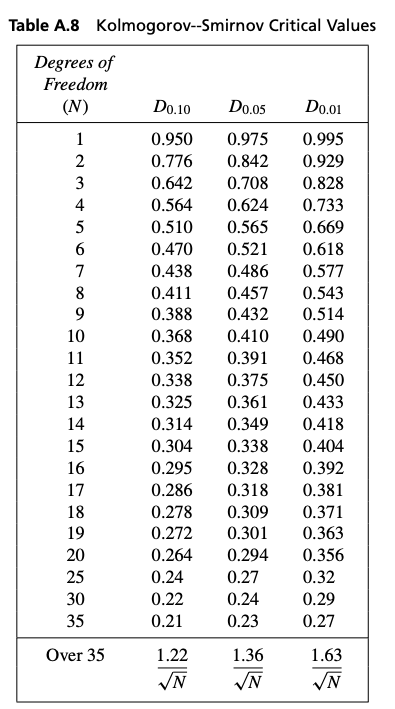




**Step 5**: If  *D* <= *D_𝛼*, conclude that no difference has been detected between the TRUE distribution and the uniform distribution

### Run Kolmogorov-Smirnov test on `uniform_array`


In [ ]:
D = Kolmogorov_Smirnov(uniform_array)
print('\nKolmogorov Smirnov Test:' )
print(D)


Kolmogorov Smirnov Test:
KS_Results(D_minus=0.03081621549803848, D_plus=0.024513211380598254, D=0.03081621549803848)


## Autocorrelation:
Implement the **Autocorrelation** test according to Section 4.2

In [ ]:
def autocorrelation(R, i, l):

  class AResults(NamedTuple):
    ro:     numpy.float32
    sigma:  numpy.float32
    Z0:      numpy.float32

  N = len(R)
  i = i-1
  s = 0
  M = (N - i - l) // l

  for k in range (M + 1):
    s = s + ( R[i + (k * l)] * R[i + ((k+1) * l)] )


  ro = (1 / (M + 1)) * s - 0.25
  sigma = math.sqrt((13 * M) + 7) / (12 * (M+1))
  Z0 = ro / sigma

  return AResults(ro, sigma, Z0)


### Run autocorrelation test on `uniform_array`

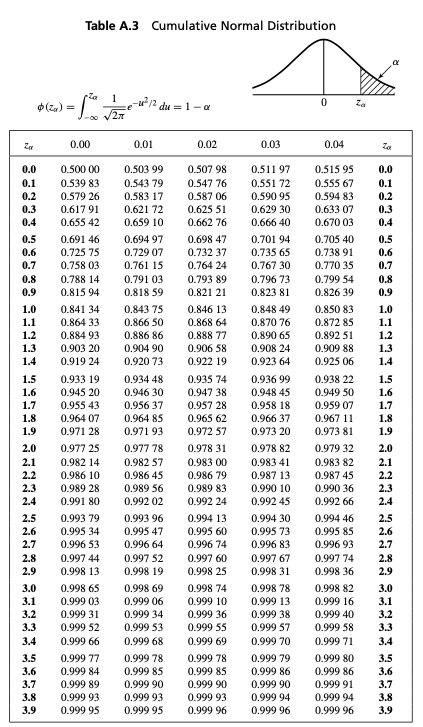
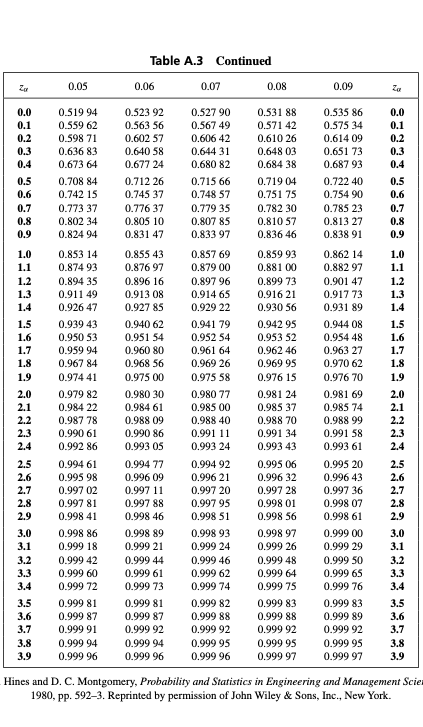

Check autocorrelation with parameters:
- i = 3
- l = 5
- 𝛼 = 0.05

Then, check wether -z_𝛼/2 <= Z0 <=  z_𝛼/2 (see table above)

In [ ]:
D = autocorrelation(uniform_array, 3, 5)
print('\nAutocorrelation Test:' )
print(D)


Autocorrelation Test:
AResults(ro=0.004135231259058125, sigma=0.021274515570989177, Z0=0.19437487285008268)


#Variate Generator



 ## Implementing a Variate Generator for Exponential Distribution
The exponential distribution has the probability density function (pdf):
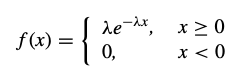

and the cumulative distribution function (cdf): 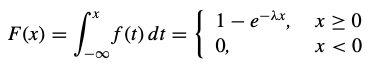


Allying the Inverse-Transform tecnique (see Section 1), it results: 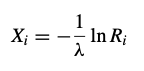

where R_i is a uniform random number.

In [ ]:
class ExponentialGenerator:

  def __init__(self):
      pass

  def set_seed(self, s):
    random.seed(s)

  def random(self, mean):
    R = random.random()
    res = - (1/mean) * numpy.log(R)
    return res


def exponential_array(samples, mean, seed=None):
  ed = ExponentialGenerator()
  ed.set_seed(seed)

  ed_list = []
  for i in range(samples):
    ed_list.append(ed.random(0.5))
  return numpy.array(ed_list)


exp_array = exponential_array(SIZE, 1000)
print(exp_array)

[1.34493906e+00 2.18847795e+00 2.60642990e+00 3.89944208e+00
 2.23180095e+00 1.15990854e+00 4.34597260e-01 1.11557504e+00
 4.03497128e-01 1.32514092e+00 2.44409450e+00 7.49064434e-01
 8.98479657e-01 8.26791795e-01 1.29346143e+00 3.47838003e+00
 1.42765242e+00 4.80064006e+00 2.48149432e+00 9.35561347e-01
 5.49631561e+00 5.83994314e-01 2.63662859e-01 3.49403534e-01
 7.71189900e-01 2.87568933e-01 1.64184121e+00 3.38907485e-01
 4.31192729e+00 9.64179671e-01 2.13411256e+00 4.18821299e+00
 2.54211654e-01 2.23454213e+00 3.36454788e+00 7.33754629e+00
 2.89147482e+00 6.92728495e+00 3.56092245e-01 1.69676219e+00
 1.46131459e+00 2.38680513e+00 1.81348048e-02 7.61294440e-01
 4.88909587e-02 4.74866599e-01 3.23218192e-01 1.83902607e+00
 4.93033413e-02 5.17767808e-02 2.29406342e+00 7.59540612e-01
 3.88024211e+00 6.45309735e-01 3.84467133e+00 4.72524295e-01
 3.80793635e-01 8.39839772e-01 2.50025101e-01 1.14330845e+00
 1.68459684e+00 3.15864444e+00 1.14728501e+00 2.01304014e+00
 1.67797285e+00 1.851146

# Exercise: Triangular Distribution

Consider a random variable X that has pdf: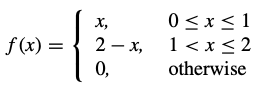

as shown in Figure:
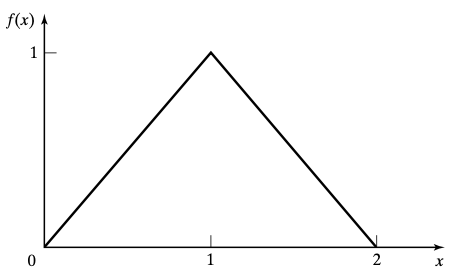

This distribution is called a **triangular distribution** with endpoints (0, 2) and mode at 1.

Using the Inverse-Transform Technique, write a random variate to sample from such a distribution (see Chapter Random-Variate Generation, Section 1.4)



###Exercise Solution

In [ ]:
class TriangularGenerator:

  def __init__(self):
    self.seed = random.random()

  def set_seed(self, s):
    self.seed = s

  def random(self, mean):
    R = random.random()
    if R >= 0 and R <= 0.5:
      return math.sqrt(2 * R)
    else:
      return 2 - math.sqrt(2 * (1 - R))



In [ ]:
#Generate an array of random numbers from the Triangular Distribution

def triangular_array(samples, seed):
  ed = TriangularGenerator()
  ed.set_seed(seed)

  ed_list = []
  for i in range(samples):
    ed_list.append(ed.random(0.5))
  return numpy.array(ed_list)


tri_array = triangular_array(SIZE, SEED)
print(tri_array)

[0.63241845 1.55076421 1.03886201 1.48483164 0.69466522 0.92269882
 1.57493852 0.6588995  0.96543182 1.51659429 1.08871445 0.84644949
 1.08907394 0.94243886 1.01955064 0.87020166 0.55705143 0.58777575
 1.41846036 0.97769559 1.15277744 1.0801094  0.59162682 0.91475884
 1.11757586 0.594652   0.19078291 1.16342758 1.55157016 0.7048462
 0.87767694 0.80697903 0.72697168 0.35251362 1.2196348  1.16102411
 0.94352948 0.9836469  1.14215301 1.62631336 1.24658655 1.08288916
 0.31235913 1.2730568  0.9500552  1.27160116 0.50983484 0.96565136
 1.06754392 0.98356125 1.85385769 0.4330218  0.8403109  1.34355642
 0.72882783 0.96032779 1.66607108 1.36085245 0.84154001 0.3568109
 1.14636801 1.87571426 0.42762954 0.63977443 1.47293227 0.26251855
 0.75550278 1.50376267 0.75029131 0.77732555 0.85065199 0.99283156
 1.29949889 1.46573557 0.62325798 0.74964814 1.81819327 1.38286079
 0.54331423 1.04762232 0.19688169 1.04074826 1.49188465 1.41443344
 0.69635474 0.25807259 0.85191549 0.80850656 1.19778517 0.957397

#Testing `uniform_array` and `exp_array`

###Histograms

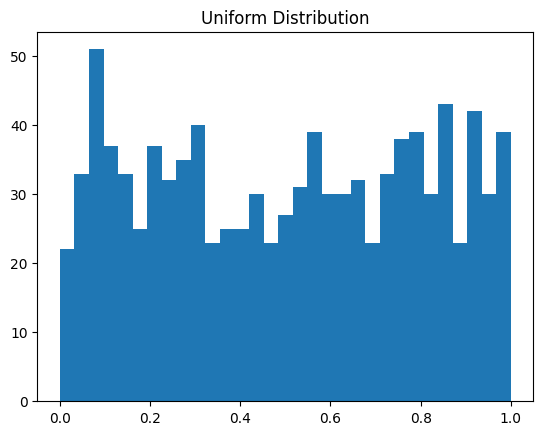

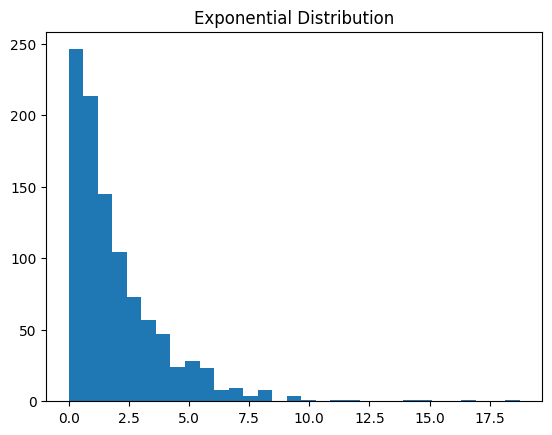

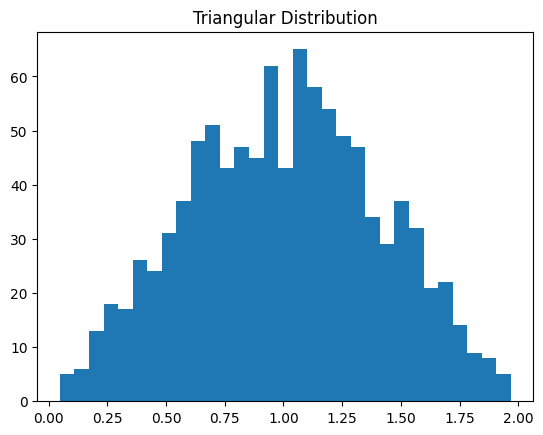

In [ ]:
def build_histogram(arr, title):
  bins_num = math.floor(math.sqrt(arr.size))
  n, bins, patches = plt.hist(arr, bins= bins_num)

  plt.title(title)
  plt.show()

build_histogram(uniform_array, "Uniform Distribution")

build_histogram(exp_array, "Exponential Distribution")

build_histogram(tri_array, "Triangular Distribution")

### QQPlot

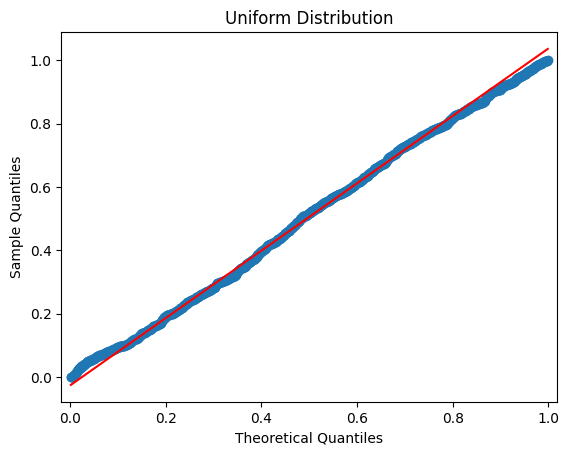

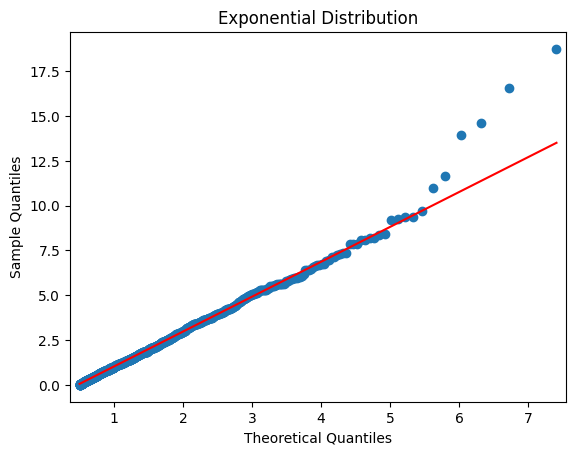

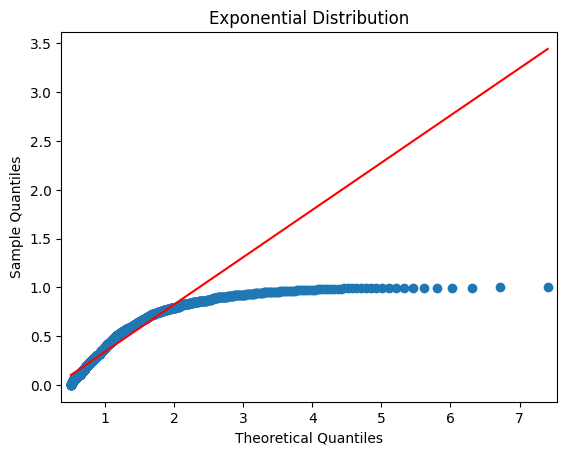

In [ ]:
def qqplot_uniform(arr):
  sm.qqplot(arr, stats.uniform, line = 'q')
  plt.title("Uniform Distribution")
  plt.show()

def qqplot_exponential(arr):
  sm.qqplot(arr, stats.expon(0.5), line = 'q')
  plt.title("Exponential Distribution")
  plt.show()


qqplot_uniform(uniform_array)

qqplot_exponential(exp_array)

qqplot_exponential(uniform_array)